In [309]:
from pylab import rcParams

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [435]:
data_tax = pd.read_csv('test.csv')
# data_tax
data_tax_bar = data_tax.groupby('vendor_id').count().reset_index()
data_tax_bar

,vendor_id,id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,290760,290760,290760,290760,290760,290760,290760,290760
1,2,334374,334374,334374,334374,334374,334374,334374,334374


Построим столбчатую диаграму и посмотрим у какого перевозчика больше поездок.

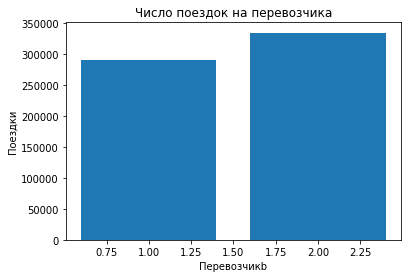

In [466]:
plt.bar(data_tax_bar['vendor_id'], data_tax_bar['passenger_count'])
plt.xlabel('Перевозчикb')
plt.ylabel('Поездки')
plt.title('Число поездок на перевозчика')
plt.show()

Построим круговую диагрумму с соотношением перевозок первого и второго перевозчика.

In [289]:
def percent(percent_):
    
    one = 100 / data_tax_barh['passenger_count'].sum() 
    
    return percent_ * one

data_tax_bar['percent'] = data_tax_bar['passenger_count'].apply(percent)
data_tax_bar

,vendor_id,id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,percent
0,1,290760,290760,290760,290760,290760,290760,290760,290760,46.511628
1,2,334374,334374,334374,334374,334374,334374,334374,334374,53.488372


Text(0.5, 1.0, 'Число поездок на перевозчика')

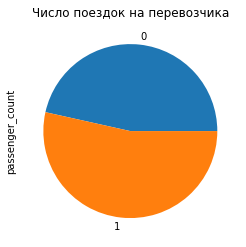

In [442]:
data_tax_bar['passenger_count'].plot(kind='pie',y='vendor_id')
plt.title('Число поездок на перевозчика')



Выведем число поездок и в зависимости от числа пассажиров.

In [350]:
data_tax_passenger_count = data_tax.groupby(['passenger_count']).count().reset_index()
data_tax_passenger_count

,passenger_count,id,vendor_id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,0,23,23,23,23,23,23,23,23
1,1,443447,443447,443447,443447,443447,443447,443447,443447
2,2,90027,90027,90027,90027,90027,90027,90027,90027
3,3,25686,25686,25686,25686,25686,25686,25686,25686
4,4,12017,12017,12017,12017,12017,12017,12017,12017
5,5,33411,33411,33411,33411,33411,33411,33411,33411
6,6,20521,20521,20521,20521,20521,20521,20521,20521
7,9,2,2,2,2,2,2,2,2


<BarContainer object of 8 artists>

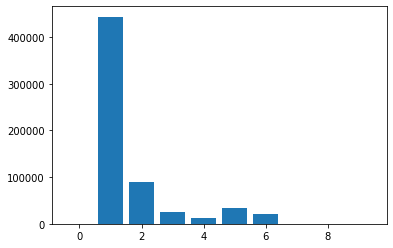

In [352]:
plt.bar(data_tax_passenger_count['passenger_count'], data_tax_passenger_count['vendor_id'])

Построим распределение числа поездок и в зависимости от числа пассажиров.

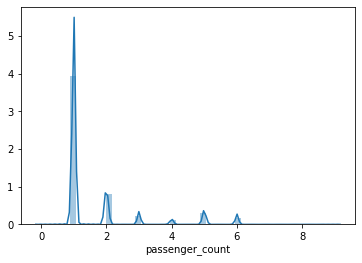

In [353]:
sns.distplot(data_tax.passenger_count)

In [354]:
data_players = pd.read_csv('datasets_1358_30676_Players.csv')

data_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


Построим график, в котором отразим, сколько университетов имеет от 5 до 90 игроков.

Т.е. в 30 университетов имеет по 5 игроков, и только 5 университетов имеют по 30 игроков. 

In [362]:
df_player_college = data_players.groupby('collage').count().reset_index()

df_player_college_1 = df_player_college[df_player_college['Player'] > 5]
df_player_college_1
# sns.jointplot(x='collage', y='birth_city', 
#               data=date_players, kind='scatter')

,collage,Unnamed: 0,Player,height,weight,born,birth_city,birth_state
9,Arizona State University,21,21,21,21,21,20,20
11,Auburn University,16,16,16,16,16,16,16
21,Baylor University,11,11,11,11,11,10,10
29,Boston College,18,18,18,18,18,17,17
31,Bowling Green State University,15,15,15,15,15,10,10
...,...,...,...,...,...,...,...,...
401,West Virginia University,14,14,14,14,14,12,12
407,Western Kentucky University,24,24,24,24,24,14,14
408,Western Michigan University,6,6,6,6,6,6,6
411,Wichita State University,11,11,11,11,11,10,10


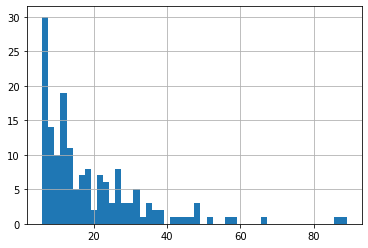

In [444]:
df_player_college_1.Player.hist(bins=50)

Построим box plot по росту за весь период

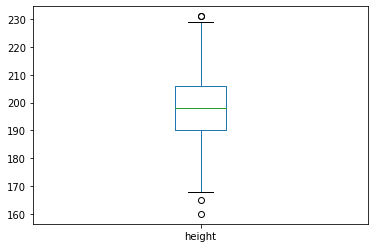

In [445]:
data_players['height'].plot(kind='box')

Построим box plot по росту за 1997 год

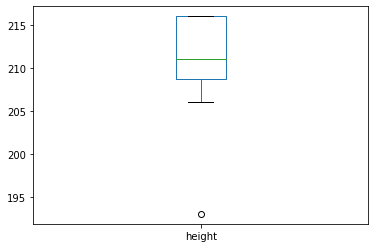

In [463]:
data_players_1997 = data_players[data_players['born'] > 1996]
data_players_1997['height'].plot(kind='box')

 График распределения игоров по университетам и их роста, но кроме явного среднего роста от 190 до 210 на нем ничего не видно =)

In [74]:
df_player_college_mean = data_players.groupby('collage')[['height']].mean().reset_index()
df_player_college_mean

,collage,height
0,Acadia University,188.000000
1,Alabama A&M University,211.000000
2,Alabama State University,198.000000
3,Albany State University,207.250000
4,Alcorn State University,200.000000
...,...,...
417,Wright State University,205.500000
418,Xavier University,198.312500
419,Xavier University of Louisiana,195.333333
420,Yale University,190.000000


In [360]:
trace0 = go.Scatter(
    x=df_player_college_mean.height,
    y=df_player_college_mean.collage,
    mode = 'markers'
) 

data = [trace0]
layout = { 'yaxis': {'title': 'university'}, 
          'xaxis': {'title': 'height'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

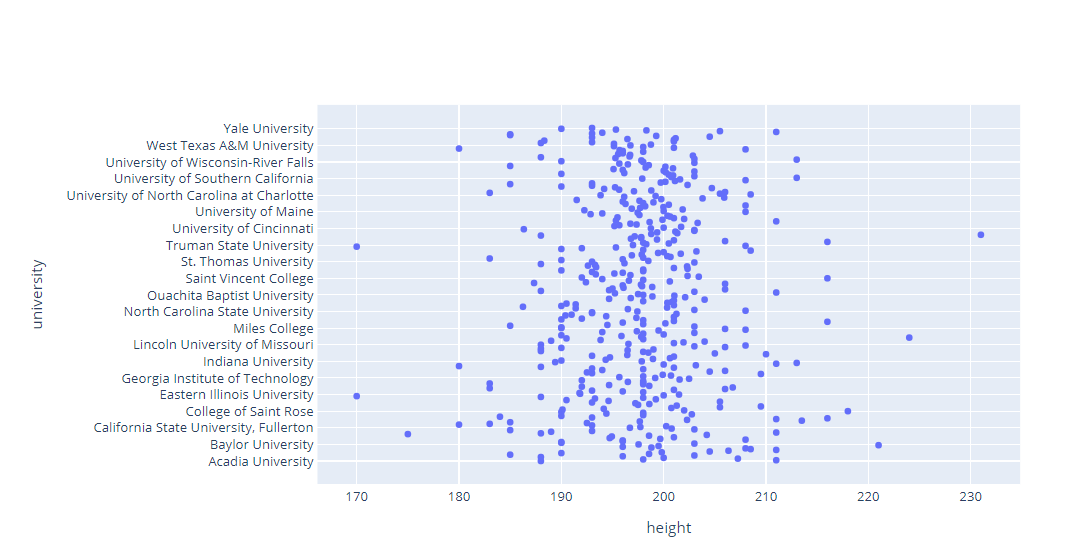

In [59]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Расчет средней высоты спортсменнов в зависимости от года. 

Из построеного графика видно, что средняя высота играков увеличивалась до 60-х готов. 

In [384]:
data_players_mean_born_height = data_players.groupby('born')[['height']].mean().reset_index()
data_players_mean_born_height

,born,height
0,1913.0,185.000000
1,1914.0,180.000000
2,1915.0,198.000000
3,1917.0,189.333333
4,1918.0,186.200000
...,...,...
79,1993.0,199.920000
80,1994.0,199.829268
81,1995.0,204.258065
82,1996.0,200.789474


In [385]:

trace0 = go.Scatter(
    x=data_players_mean_born_height.born,
    y=data_players_mean_born_height.height,
    mode = 'markers'
)

data = [trace0]

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

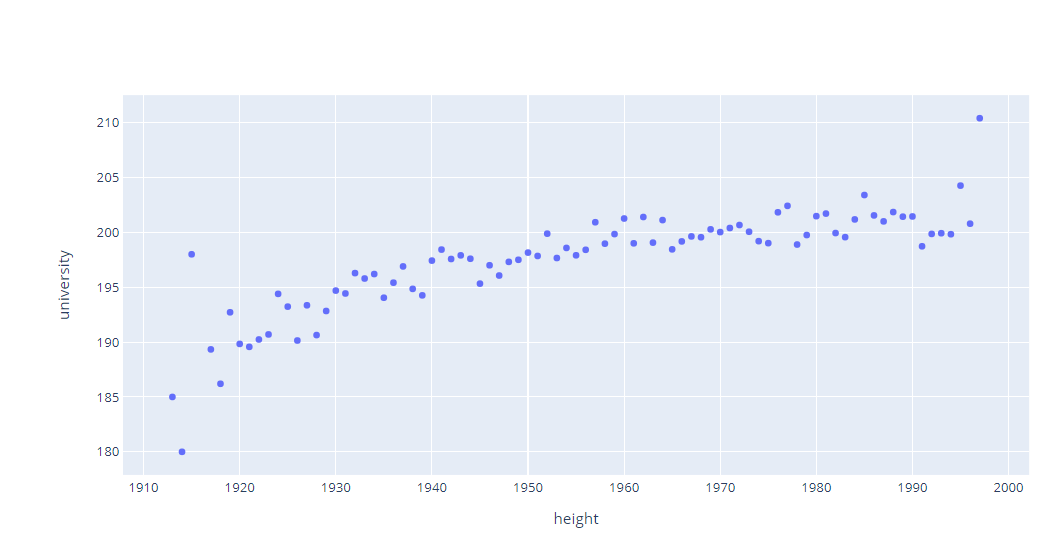

In [478]:
# # data_players_mean_born_collage = data_players.groupby('collage')[['born']]
# # data_players_count_born_collage

# data_players_mean_born_collage = data_players.groupby('collage')[['born']].mean()
# data_players_count_born_collage = data_players.groupby('collage')[['born']].count().reset_index()
# # data_players_height_born_collage = data_players.groupby('born')[['height']].mean()

# ddf = data_players_mean_born_collage.join(data_players_count_born_collage)


In [477]:
# trace0 = go.Scatter(
#     x=data_players_mean_born_height.born,
#     y=data_players_mean_born_height.height,
#     mode = 'markers+text',
#     text = data_players_mean_born_height.index,
#     marker = dict(
#         size = data_players_itog.Player,

#     )
# )

# data = [trace0]
# layout = {
#     'title': 'Statistics of video games genres',
#     'xaxis': {'title': 'Critic Score'},
#     'yaxis': {'title': 'User Score'}
# }

# fig = go.Figure(data=data, layout=layout)

# iplot(fig, show_link=False)